In [313]:
import os
import ast
import wget
import json
import urllib
import urllib2
import zipfile
import numpy as np
import scipy.stats
import pysal as psl
import pandas as pd
import datetime as dt
import geopandas as gpd
import matplotlib.pylab as plt

from matplotlib import gridspec
from cStringIO import StringIO
from fiona.crs import from_epsg
from sklearn.cluster import KMeans
from geopandas import GeoDataFrame
from shapely.geometry import Point
from scipy.cluster.vq import whiten

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
ct = gpd.read_file("manhattan_wo_hl/man_wo_hl.shp")
ct.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((994133.507019043 214848.8975830078, ..."
1,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((993108.3057861328 216013.1307983398,..."
2,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((992216.5391845703 216507.6870117188,..."
3,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((991325.8815917969 217001.6885986328,..."
4,1011402,1,Manhattan,I,011402,114.02,MN40,Upper East Side-Carnegie Hill,3805,1.063547e+06,4125.256029,"POLYGON ((994013.2479858398 217645.299621582, ..."


In [50]:
ct_crs = ct.to_crs(epsg=4326)
ct_crs.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478757 40.75638153102422...
1,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814008615...
2,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641851238...
3,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97445730550224 40.7622930835582,..."
4,1011402,1,Manhattan,I,011402,114.02,MN40,Upper East Side-Carnegie Hill,3805,1.063547e+06,4125.256029,POLYGON ((-73.96475544914023 40.76405707063299...


In [51]:
ct_crs.columns

Index([u'BoroCT2010',   u'BoroCode',   u'BoroName', u'CDEligibil',
           u'CT2010',    u'CTLabel',    u'NTACode',    u'NTAName',
             u'PUMA', u'Shape_Area', u'Shape_Leng',   u'geometry'],
      dtype='object')

In [52]:
ct_crs = ct_crs.drop([u'NTACode', u'NTAName', u'PUMA',u'CDEligibil'], axis = 1)
ct_crs.head()

,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area,Shape_Leng,geometry
0,1009800,1,Manhattan,009800,98,1.906016e+06,5534.199811,POLYGON ((-73.96432543478757 40.75638153102422...
1,1010000,1,Manhattan,010000,100,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814008615...
2,1010200,1,Manhattan,010200,102,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641851238...
3,1010400,1,Manhattan,010400,104,1.864600e+06,5693.036367,"POLYGON ((-73.97445730550224 40.7622930835582,..."
4,1011402,1,Manhattan,011402,114.02,1.063547e+06,4125.256029,POLYGON ((-73.96475544914023 40.76405707063299...


In [53]:
ct_h = gpd.read_file("Highline_ct/highline_ct.shp")
ct_h.head(1)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,1011300,1,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((988650.2766113281 214286.4022216797,..."


In [54]:
ct_h_crs = ct_h.to_crs(epsg=4326)
ct_h_crs.head(1)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,1011300,1,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,POLYGON ((-73.98411754823196 40.75484205349795...


In [55]:
ct_h.columns

Index([u'BoroCT2010',   u'BoroCode',   u'BoroName', u'CDEligibil',
           u'CT2010',    u'CTLabel',    u'NTACode',    u'NTAName',
             u'PUMA', u'Shape_Area', u'Shape_Leng',   u'geometry'],
      dtype='object')

In [56]:
ct_h_crs = ct_h_crs.drop([u'NTACode', u'NTAName', u'PUMA',u'CDEligibil'], axis = 1)
ct_h_crs.head()

,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area,Shape_Leng,geometry
0,1011300,1,Manhattan,011300,113,1.890907e+06,5699.860641,POLYGON ((-73.98411754823196 40.75484205349795...
1,1011900,1,Manhattan,011900,119,1.911311e+06,5722.090339,POLYGON ((-73.98225528672133 40.75738736492881...
2,1012500,1,Manhattan,012500,125,1.875482e+06,5683.937071,"POLYGON ((-73.98042606433056 40.7598990811126,..."
3,1009500,1,Manhattan,009500,95,1.851216e+06,5659.083272,POLYGON ((-73.98961683107569 40.74727642272814...
4,1012700,1,Manhattan,012700,127,1.871751e+06,5682.311727,POLYGON ((-73.98610406084958 40.76228995263752...


In [57]:
zip_codes_shape = gpd.read_file("NYC_zipcode_ploygons.geojson")
zip_codes_shape.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [58]:
zip_codes_shape = zip_codes_shape.drop([ u'@id', u'BLDGpostalCode', u'PO_NAME', u'CTY_FIPS', 
                                        u'ST_FIPS', u'STATE', u'OBJECTID'], axis = 1)
zip_codes_shape = zip_codes_shape.rename(columns={'postalCode' : 'zip_code'})
zip_codes_shape['zip_code'] = pd.to_numeric(zip_codes_shape['zip_code'], errors = 'coerce')
zip_codes_shape.head()

,Shape_Area,Shape_Leng,borough,geometry,zip_code
0,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [59]:
zip_codes_shape['zip_code'] = pd.to_numeric(zip_codes_shape['zip_code'])

In [60]:
year = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14"]

for i in year:
    temp = pd.read_csv(('zbp'+ i +'totals.txt'))
    temp.columns = map(str.lower, temp.columns)
    temp = temp[['zip', 'est']]
    year = dt.datetime.strptime(str(i), '%y').year
    temp.rename(columns={'est': str(year), 'zip':'zip_code'}, inplace=True)
    zip_codes_shape = zip_codes_shape.merge(temp, on = 'zip_code', how = 'inner')
    print("Year "+str(i)+'\n')
    print(zip_codes_shape.head())
    print('\n')

zip_codes_shape.head()

Year 00

     Shape_Area    Shape_Leng borough  \
0  2.016328e+07  20624.692317  Queens   
1  2.260653e+07  23002.816039  Queens   
2  6.269333e+06  15749.161511  Queens   
3  4.941836e+07  35932.810639  Queens   
4  6.938587e+07  38693.565676  Queens   

                                            geometry  zip_code  2000  
0  POLYGON ((-73.86942457284175 40.74915687096787...     11372  1409  
1  POLYGON ((-73.71068374074007 40.75004039450917...     11004   189  
2  POLYGON ((-73.70098278625547 40.73889569923034...     11040  1350  
3  POLYGON ((-73.72270447144122 40.75373371438336...     11426   213  
4  POLYGON ((-73.81088634744755 40.72717187575918...     11365   553  


Year 01

     Shape_Area    Shape_Leng borough  \
0  2.016328e+07  20624.692317  Queens   
1  2.260653e+07  23002.816039  Queens   
2  6.269333e+06  15749.161511  Queens   
3  4.941836e+07  35932.810639  Queens   
4  6.938587e+07  38693.565676  Queens   

                                            geometry  zip_co

,Shape_Area,Shape_Leng,borough,geometry,zip_code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1409,1408,1463,1521,1554,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,189,204,214,228,226,225,226,238,227,233,229,222,241,241,250
2,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1350,1341,1398,1403,1406,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534
3,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,213,217,207,211,221,226,226,228,226,237,248,256,266,258,260
4,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,553,574,574,582,599,604,608,617,616,628,643,677,679,714,731


In [61]:
len(zip_codes_shape['zip_code'].unique())

233

In [62]:
zip_file = zip_codes_shape[zip_codes_shape['borough'].str.contains("Manhattan")]
zip_file.head()

,Shape_Area,Shape_Leng,borough,geometry,zip_code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
43,3.119702e+06,7791.517127,Manhattan,"POLYGON ((-73.915441048975 40.87559096359296, ...",10463,935,934,959,969,982,988,983,1004,1006,1015,1025,1038,1059,1083,1096
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,536,544,537,545,560,575,588,600,600,637
52,1.615605e+07,29415.607123,Manhattan,POLYGON ((-73.93213126627553 40.86945065275044...,10033,888,864,913,933,952,939,944,966,946,963,1000,1002,1012,1014,985
54,1.634074e+07,24554.784403,Manhattan,"POLYGON ((-73.93378898818895 40.8630718729956,...",10040,487,474,510,518,537,535,513,528,510,514,521,538,566,577,589
60,2.315957e+07,31657.925048,Manhattan,POLYGON ((-73.94691631035546 40.85053396462935...,10032,630,628,704,713,716,718,718,709,691,727,740,764,803,858,823


In [143]:
zip_file.crs = from_epsg(4326)

In [198]:
data_mn_wh = gpd.sjoin(zip_file, ct_crs)
data_mn_wh.head()

,Shape_Area_left,Shape_Leng_left,borough,geometry,zip_code,2000,2001,2002,2003,2004,...,2013,2014,index_right,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area_right,Shape_Leng_right
43,3.119702e+06,7791.517127,Manhattan,"POLYGON ((-73.915441048975 40.87559096359296, ...",10463,935,934,959,969,982,...,1083,1096,135,1030900,1,Manhattan,030900,309,3.282243e+06,7744.333815
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,27,1029300,1,Manhattan,029300,293,1.690645e+06,5489.623555
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,93,1029500,1,Manhattan,029500,295,1.460098e+06,5237.025388
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,125,1028700,1,Manhattan,028700,287,5.710876e+06,12407.587412
52,1.615605e+07,29415.607123,Manhattan,POLYGON ((-73.93213126627553 40.86945065275044...,10033,888,864,913,933,952,...,1014,985,125,1028700,1,Manhattan,028700,287,5.710876e+06,12407.587412


In [199]:
data_mn_wh.shape

(535, 28)

In [200]:
data_mn_wh.head()

,Shape_Area_left,Shape_Leng_left,borough,geometry,zip_code,2000,2001,2002,2003,2004,...,2013,2014,index_right,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area_right,Shape_Leng_right
43,3.119702e+06,7791.517127,Manhattan,"POLYGON ((-73.915441048975 40.87559096359296, ...",10463,935,934,959,969,982,...,1083,1096,135,1030900,1,Manhattan,030900,309,3.282243e+06,7744.333815
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,27,1029300,1,Manhattan,029300,293,1.690645e+06,5489.623555
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,93,1029500,1,Manhattan,029500,295,1.460098e+06,5237.025388
51,2.450389e+07,28233.753520,Manhattan,"POLYGON ((-73.92062094847111 40.873001790648, ...",10034,473,491,540,546,543,...,600,637,125,1028700,1,Manhattan,028700,287,5.710876e+06,12407.587412
52,1.615605e+07,29415.607123,Manhattan,POLYGON ((-73.93213126627553 40.86945065275044...,10033,888,864,913,933,952,...,1014,985,125,1028700,1,Manhattan,028700,287,5.710876e+06,12407.587412


In [201]:
data_H = gpd.sjoin(zip_file, ct_h_crs)
data_H.head()

,Shape_Area_left,Shape_Leng_left,borough,geometry,zip_code,2000,2001,2002,2003,2004,...,2013,2014,index_right,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area_right,Shape_Leng_right
105,1.139511e+07,16418.606668,Manhattan,"POLYGON ((-73.98134106844775 40.7586453238513,...",10036,6236,6228,6284,6278,6241,...,6179,6230,0,1011300,1,Manhattan,011300,113,1.890907e+06,5699.860641
109,1.070580e+07,19509.953857,Manhattan,POLYGON ((-74.00170164222186 40.76138075542977...,10018,6231,6230,6335,6255,6293,...,6806,6808,0,1011300,1,Manhattan,011300,113,1.890907e+06,5699.860641
105,1.139511e+07,16418.606668,Manhattan,"POLYGON ((-73.98134106844775 40.7586453238513,...",10036,6236,6228,6284,6278,6241,...,6179,6230,1,1011900,1,Manhattan,011900,119,1.911311e+06,5722.090339
109,1.070580e+07,19509.953857,Manhattan,POLYGON ((-74.00170164222186 40.76138075542977...,10018,6231,6230,6335,6255,6293,...,6806,6808,1,1011900,1,Manhattan,011900,119,1.911311e+06,5722.090339
105,1.139511e+07,16418.606668,Manhattan,"POLYGON ((-73.98134106844775 40.7586453238513,...",10036,6236,6228,6284,6278,6241,...,6179,6230,2,1012500,1,Manhattan,012500,125,1.875482e+06,5683.937071


In [202]:
data_H.shape

(59, 28)

In [203]:
data_H.columns

Index([ u'Shape_Area_left',  u'Shape_Leng_left',          u'borough',
               u'geometry',         u'zip_code',             u'2000',
                   u'2001',             u'2002',             u'2003',
                   u'2004',             u'2005',             u'2006',
                   u'2007',             u'2008',             u'2009',
                   u'2010',             u'2011',             u'2012',
                   u'2013',             u'2014',      u'index_right',
             u'BoroCT2010',         u'BoroCode',         u'BoroName',
                 u'CT2010',          u'CTLabel', u'Shape_Area_right',
       u'Shape_Leng_right'],
      dtype='object')

In [204]:
data_high = data_H.drop([u'Shape_Area_left', u'Shape_Leng_left', u'geometry', u'zip_code', u'index_right', 
                         u'BoroCT2010', u'BoroCode', u'BoroName', u'CT2010', u'CTLabel', u'Shape_Area_right',
                         u'Shape_Leng_right'], axis = 1)
data_high.head()

,borough,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
105,Manhattan,6236,6228,6284,6278,6241,6282,6269,6167,6098,6003,5974,6043,6118,6179,6230
109,Manhattan,6231,6230,6335,6255,6293,6344,6365,6679,6551,6457,6421,6449,6691,6806,6808
105,Manhattan,6236,6228,6284,6278,6241,6282,6269,6167,6098,6003,5974,6043,6118,6179,6230
109,Manhattan,6231,6230,6335,6255,6293,6344,6365,6679,6551,6457,6421,6449,6691,6806,6808
105,Manhattan,6236,6228,6284,6278,6241,6282,6269,6167,6098,6003,5974,6043,6118,6179,6230


In [205]:
data_high.drop_duplicates(inplace = True)

In [206]:
data_high_2 = data_high.T
data_high_2.head()

,105,109,110,201,113,114,120,205,229,118,226,227,233,126,127
borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan
2000,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
2001,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2002,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
2003,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870


In [207]:
data_high_2 = data_high_2.drop(['borough'], axis = 0)
data_high_2.head()

,105,109,110,201,113,114,120,205,229,118,226,227,233,126,127
2000,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
2001,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2002,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
2003,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870
2004,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847


In [208]:
data_high_2.insert(0, 'Borough', 'Chelsea')
data_high_2.head()

,Borough,105,109,110,201,113,114,120,205,229,118,226,227,233,126,127
2000,Chelsea,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
2001,Chelsea,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2002,Chelsea,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
2003,Chelsea,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870
2004,Chelsea,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847


In [209]:
data_high_2 = data_high_2.reset_index()
data_high_2.head()

,index,Borough,105,109,110,201,113,114,120,205,229,118,226,227,233,126,127
0,2000,Chelsea,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
1,2001,Chelsea,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2,2002,Chelsea,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
3,2003,Chelsea,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870
4,2004,Chelsea,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847


In [210]:
data_high_2.rename(columns = {'index' : 'Year'}, inplace = True)
data_high_2.head()

,Year,Borough,105,109,110,201,113,114,120,205,229,118,226,227,233,126,127
0,2000,Chelsea,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
1,2001,Chelsea,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2,2002,Chelsea,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
3,2003,Chelsea,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870
4,2004,Chelsea,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847


In [211]:
data_mn_wh.shape

(535, 28)

In [212]:
data_high_2.shape

(15, 17)

In [213]:
data_mn_wh.columns

Index([ u'Shape_Area_left',  u'Shape_Leng_left',          u'borough',
               u'geometry',         u'zip_code',             u'2000',
                   u'2001',             u'2002',             u'2003',
                   u'2004',             u'2005',             u'2006',
                   u'2007',             u'2008',             u'2009',
                   u'2010',             u'2011',             u'2012',
                   u'2013',             u'2014',      u'index_right',
             u'BoroCT2010',         u'BoroCode',         u'BoroName',
                 u'CT2010',          u'CTLabel', u'Shape_Area_right',
       u'Shape_Leng_right'],
      dtype='object')

In [214]:
data_mn_wh = data_mn_wh.drop([u'Shape_Area_left', u'Shape_Leng_left', u'geometry', u'zip_code', u'index_right',
                              u'BoroCT2010', u'BoroCode', u'BoroName', u'CT2010', u'CTLabel', u'Shape_Area_right', 
                              u'Shape_Leng_right'], axis = 1)
data_mn_wh.head()

,borough,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
43,Manhattan,935,934,959,969,982,988,983,1004,1006,1015,1025,1038,1059,1083,1096
51,Manhattan,473,491,540,546,543,536,544,537,545,560,575,588,600,600,637
51,Manhattan,473,491,540,546,543,536,544,537,545,560,575,588,600,600,637
51,Manhattan,473,491,540,546,543,536,544,537,545,560,575,588,600,600,637
52,Manhattan,888,864,913,933,952,939,944,966,946,963,1000,1002,1012,1014,985


In [215]:
data_mn_wh.drop_duplicates(inplace = True)

In [216]:
data_MN = data_mn_wh.T
data_MN.head()

,43,51,52,54,60,65,64,70,74,69,...,237,238,242,232,204,216,217,208,223,235
borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan
2000,935,473,888,487,630,97,487,702,1894,193,...,106,9,21,21,109,56,130,113,94,137
2001,934,491,864,474,628,94,507,707,1895,211,...,102,8,19,16,121,54,120,111,93,134
2002,959,540,913,510,704,115,559,798,1947,217,...,77,8,20,35,109,46,112,89,58,113
2003,969,546,933,518,713,131,570,835,2001,213,...,86,16,28,39,108,49,114,92,55,114


In [217]:
data_MN = data_MN.drop(['borough'], axis = 0)
data_MN.head()

,43,51,52,54,60,65,64,70,74,69,...,237,238,242,232,204,216,217,208,223,235
2000,935,473,888,487,630,97,487,702,1894,193,...,106,9,21,21,109,56,130,113,94,137
2001,934,491,864,474,628,94,507,707,1895,211,...,102,8,19,16,121,54,120,111,93,134
2002,959,540,913,510,704,115,559,798,1947,217,...,77,8,20,35,109,46,112,89,58,113
2003,969,546,933,518,713,131,570,835,2001,213,...,86,16,28,39,108,49,114,92,55,114
2004,982,543,952,537,716,140,594,847,2024,218,...,434,19,33,44,105,46,112,98,55,112


In [218]:
data_MN.insert(0, 'Borough', 'Chelsea')
data_MN.head()

,Borough,43,51,52,54,60,65,64,70,74,...,237,238,242,232,204,216,217,208,223,235
2000,Chelsea,935,473,888,487,630,97,487,702,1894,...,106,9,21,21,109,56,130,113,94,137
2001,Chelsea,934,491,864,474,628,94,507,707,1895,...,102,8,19,16,121,54,120,111,93,134
2002,Chelsea,959,540,913,510,704,115,559,798,1947,...,77,8,20,35,109,46,112,89,58,113
2003,Chelsea,969,546,933,518,713,131,570,835,2001,...,86,16,28,39,108,49,114,92,55,114
2004,Chelsea,982,543,952,537,716,140,594,847,2024,...,434,19,33,44,105,46,112,98,55,112


In [219]:
data_MN['Borough'] = 'Manhattan'
data_MN.head()

,Borough,43,51,52,54,60,65,64,70,74,...,237,238,242,232,204,216,217,208,223,235
2000,Manhattan,935,473,888,487,630,97,487,702,1894,...,106,9,21,21,109,56,130,113,94,137
2001,Manhattan,934,491,864,474,628,94,507,707,1895,...,102,8,19,16,121,54,120,111,93,134
2002,Manhattan,959,540,913,510,704,115,559,798,1947,...,77,8,20,35,109,46,112,89,58,113
2003,Manhattan,969,546,933,518,713,131,570,835,2001,...,86,16,28,39,108,49,114,92,55,114
2004,Manhattan,982,543,952,537,716,140,594,847,2024,...,434,19,33,44,105,46,112,98,55,112


In [220]:
data_MN = data_MN.reset_index()
data_MN.head()

,index,Borough,43,51,52,54,60,65,64,70,...,237,238,242,232,204,216,217,208,223,235
0,2000,Manhattan,935,473,888,487,630,97,487,702,...,106,9,21,21,109,56,130,113,94,137
1,2001,Manhattan,934,491,864,474,628,94,507,707,...,102,8,19,16,121,54,120,111,93,134
2,2002,Manhattan,959,540,913,510,704,115,559,798,...,77,8,20,35,109,46,112,89,58,113
3,2003,Manhattan,969,546,933,518,713,131,570,835,...,86,16,28,39,108,49,114,92,55,114
4,2004,Manhattan,982,543,952,537,716,140,594,847,...,434,19,33,44,105,46,112,98,55,112


In [221]:
data_MN.rename(columns = {'index' : 'Year'}, inplace = True)
data_MN.head()

,Year,Borough,43,51,52,54,60,65,64,70,...,237,238,242,232,204,216,217,208,223,235
0,2000,Manhattan,935,473,888,487,630,97,487,702,...,106,9,21,21,109,56,130,113,94,137
1,2001,Manhattan,934,491,864,474,628,94,507,707,...,102,8,19,16,121,54,120,111,93,134
2,2002,Manhattan,959,540,913,510,704,115,559,798,...,77,8,20,35,109,46,112,89,58,113
3,2003,Manhattan,969,546,933,518,713,131,570,835,...,86,16,28,39,108,49,114,92,55,114
4,2004,Manhattan,982,543,952,537,716,140,594,847,...,434,19,33,44,105,46,112,98,55,112


In [222]:
data_MN.shape

(15, 90)

In [223]:
data_high_2.shape

(15, 17)

In [224]:
len(data_high_2.columns)

17

In [225]:
for i in range(len(data_high_2.columns)):
    data_high_2.rename(columns={data_high_2.columns[i] : i}, inplace = True)

In [230]:
data_high_2['sum'] = data_high_2.iloc[:,2:16].sum(axis = 1)

In [231]:
data_high_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,sum
0,2000,Chelsea,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175,38574.0
1,2001,Chelsea,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648,38389.0
2,2002,Chelsea,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863,38171.0
3,2003,Chelsea,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870,38022.0
4,2004,Chelsea,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847,38545.0


In [233]:
data_high_2.rename(columns={0 : 'year', 1 : 'location'}, inplace = True)

In [236]:
data_high_2 = data_high_2.drop(['location', 'sum'], axis = 1)
data_high_2.head()

,year,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2000,6236,6231,760,5155,7317,3653,2166,292,262,3203,262,118,55,2864,6175
1,2001,6228,6230,756,5163,7188,3592,2197,270,284,3178,280,104,61,2858,6648
2,2002,6284,6335,736,5001,7141,3682,2245,217,238,3085,254,101,45,2807,4863
3,2003,6278,6255,747,4935,7084,3711,2297,218,236,3045,259,98,41,2818,4870
4,2004,6241,6293,791,5068,7370,3729,2247,215,236,3059,267,90,58,2881,5847


In [337]:
plt.hlines?

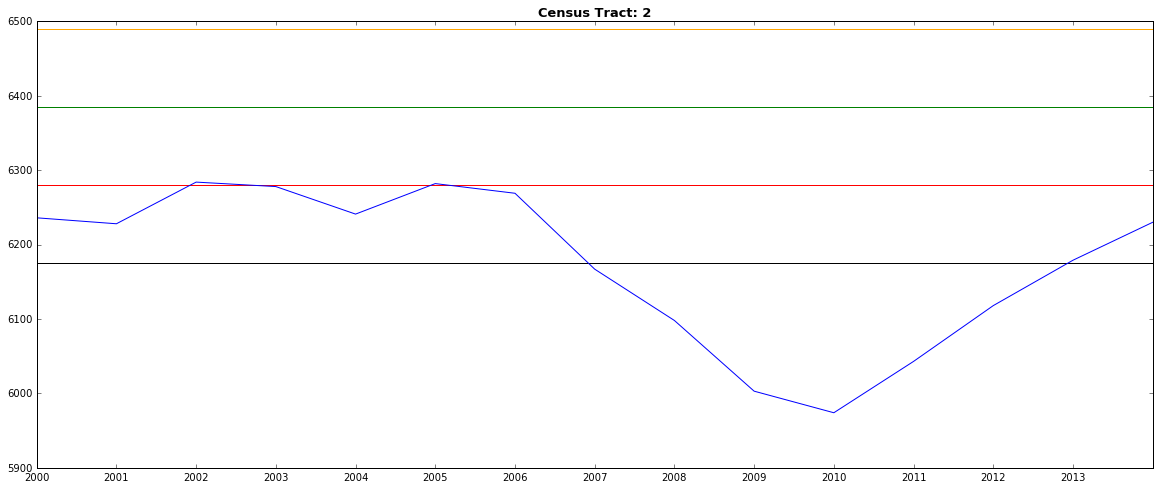

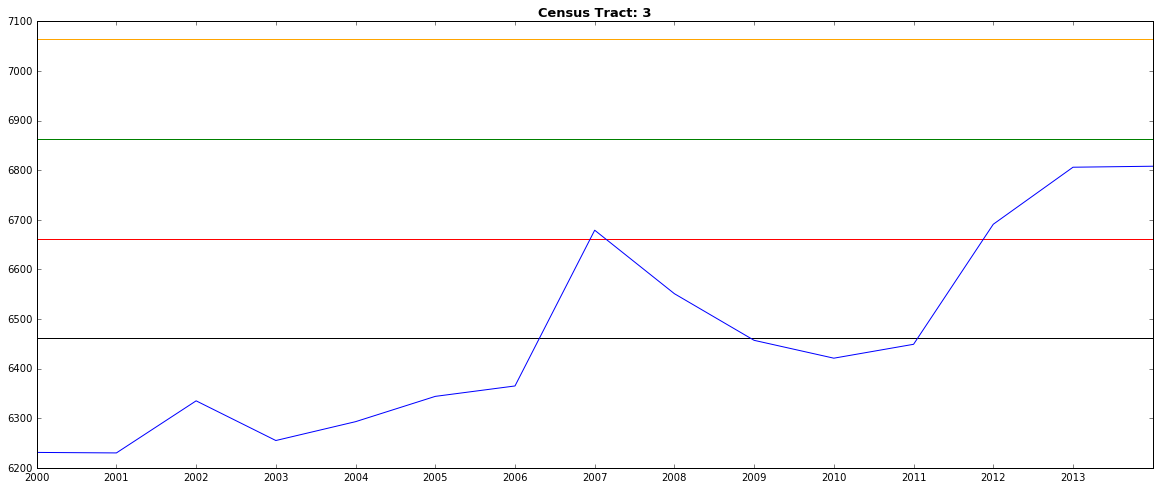

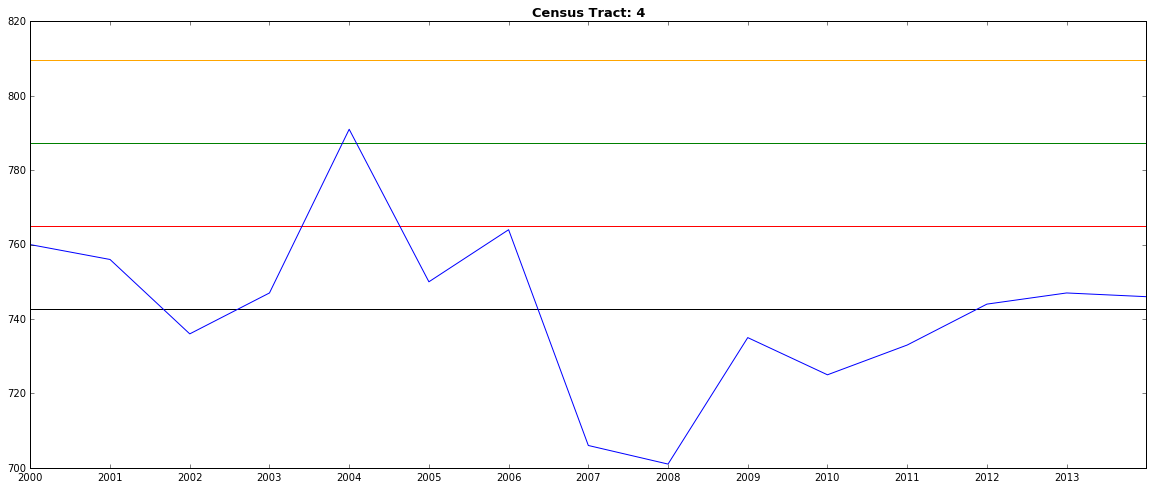

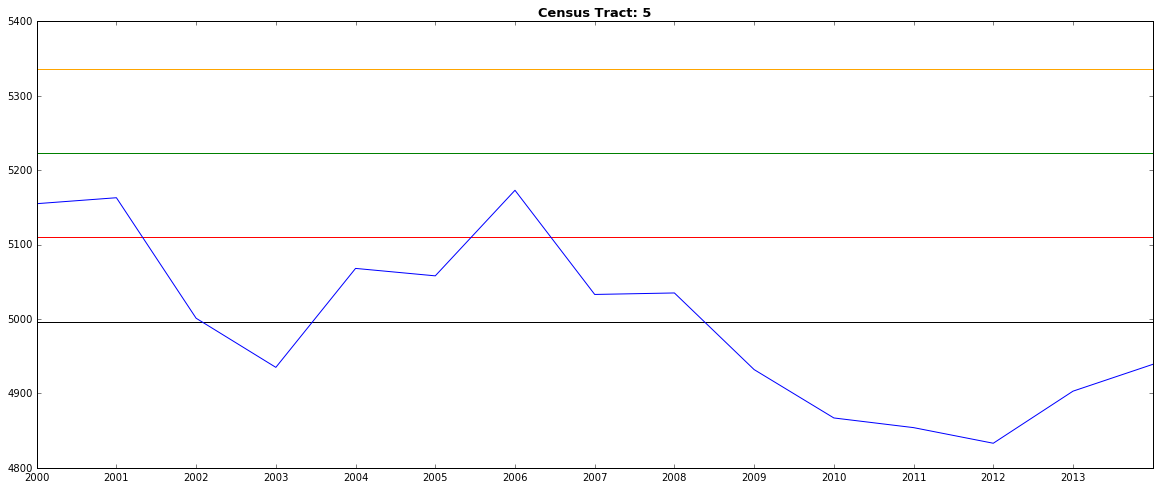

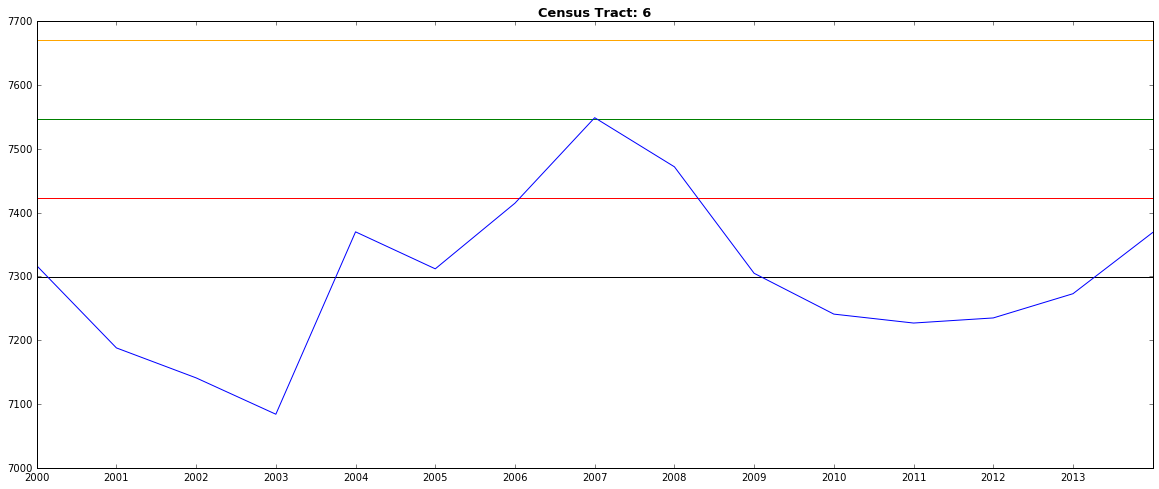

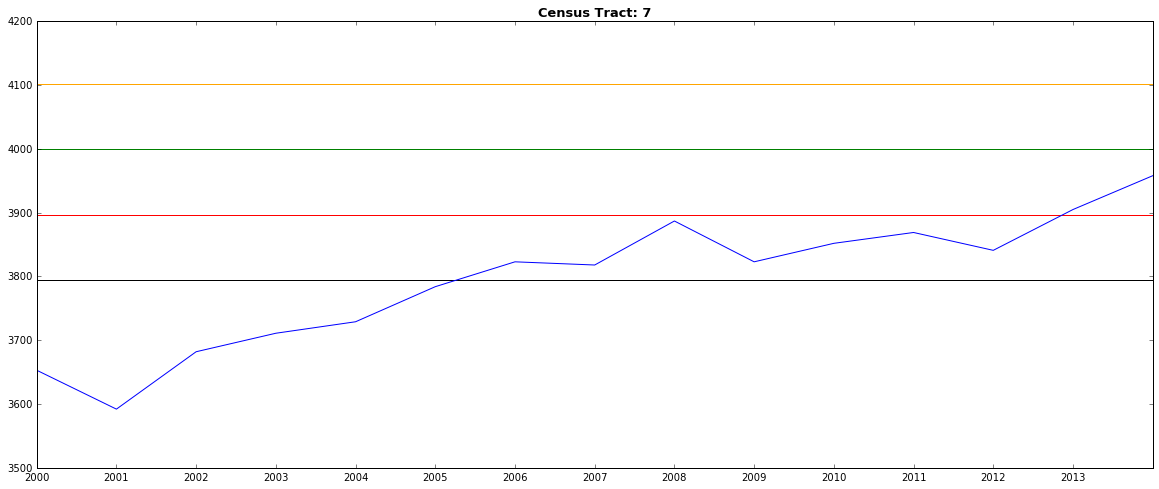

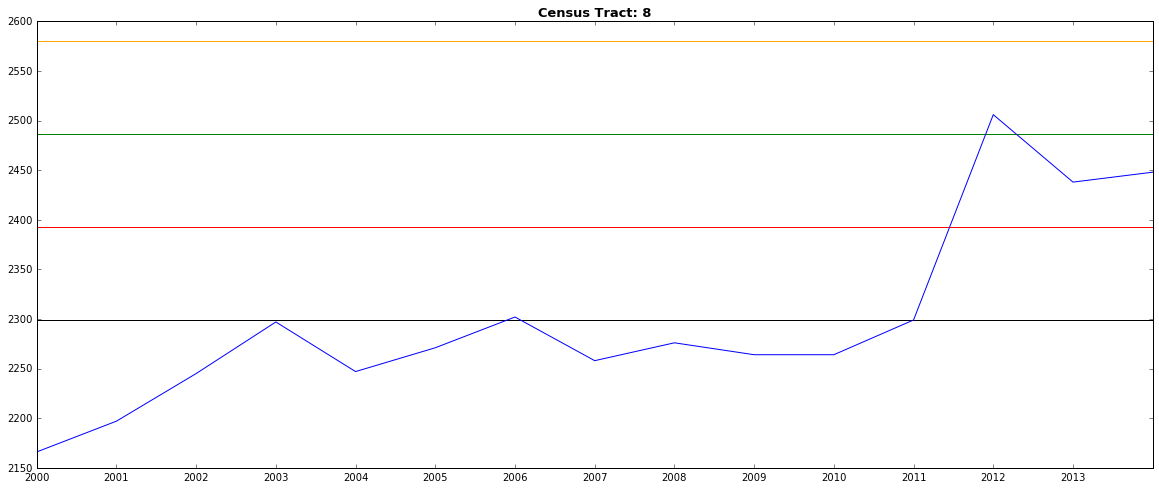

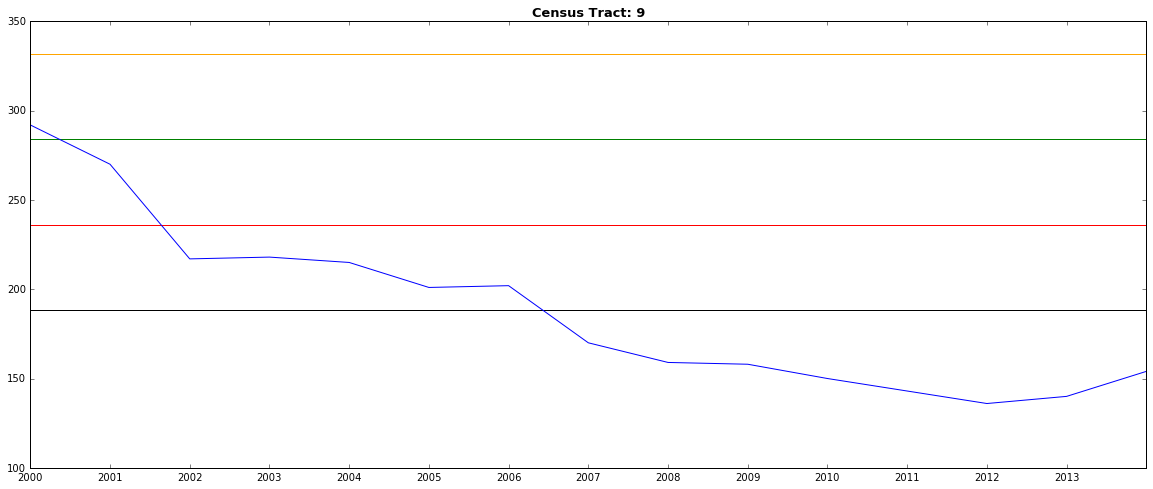

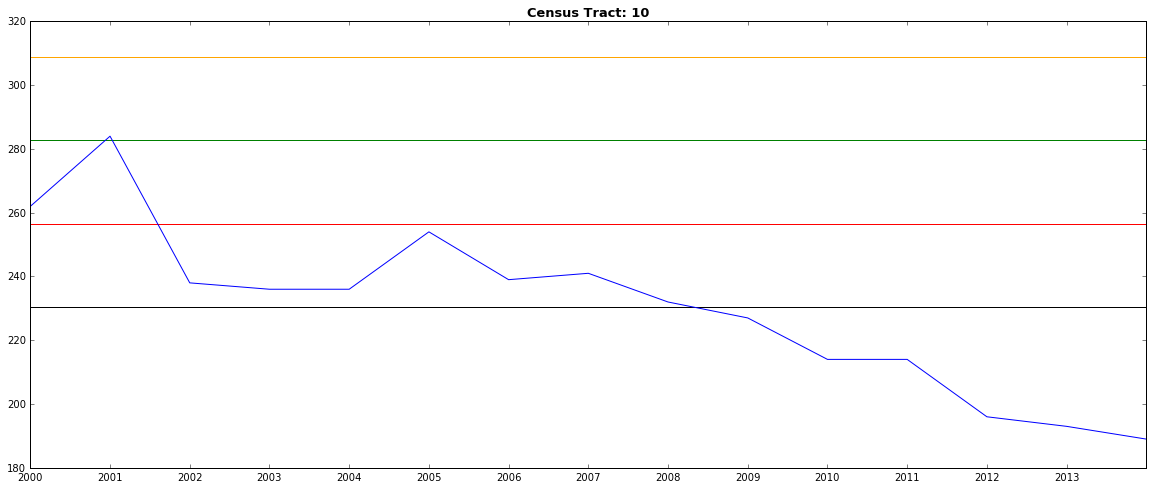

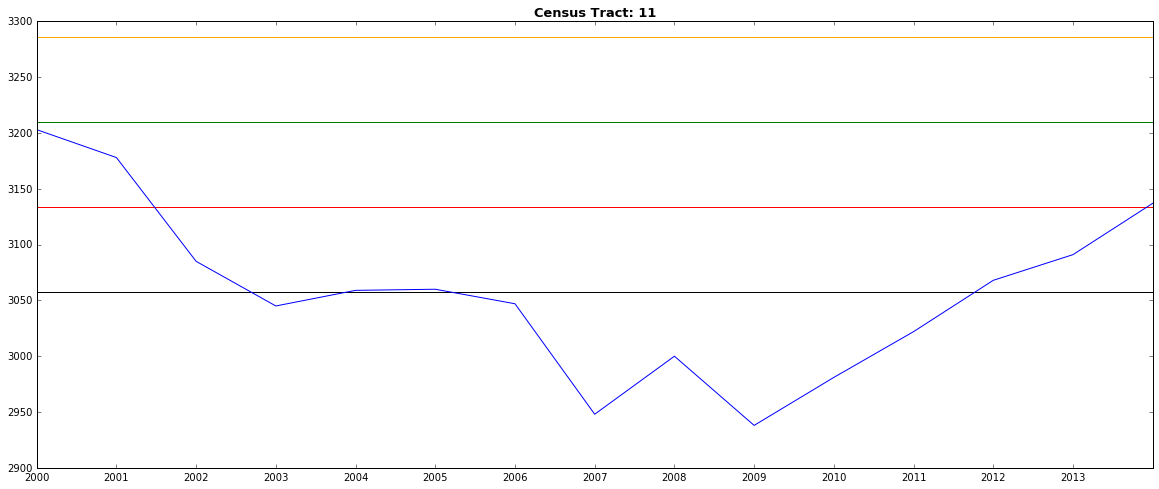

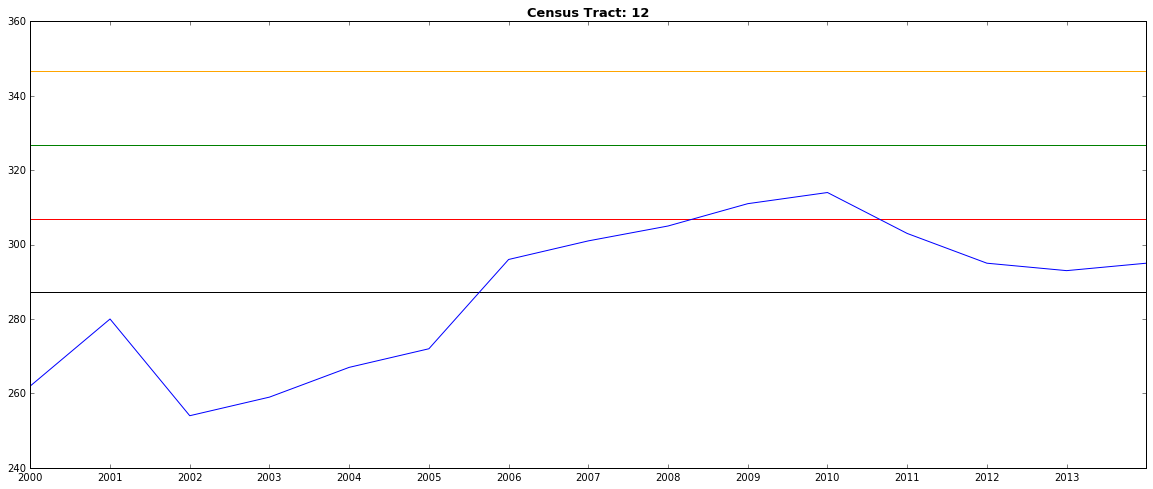

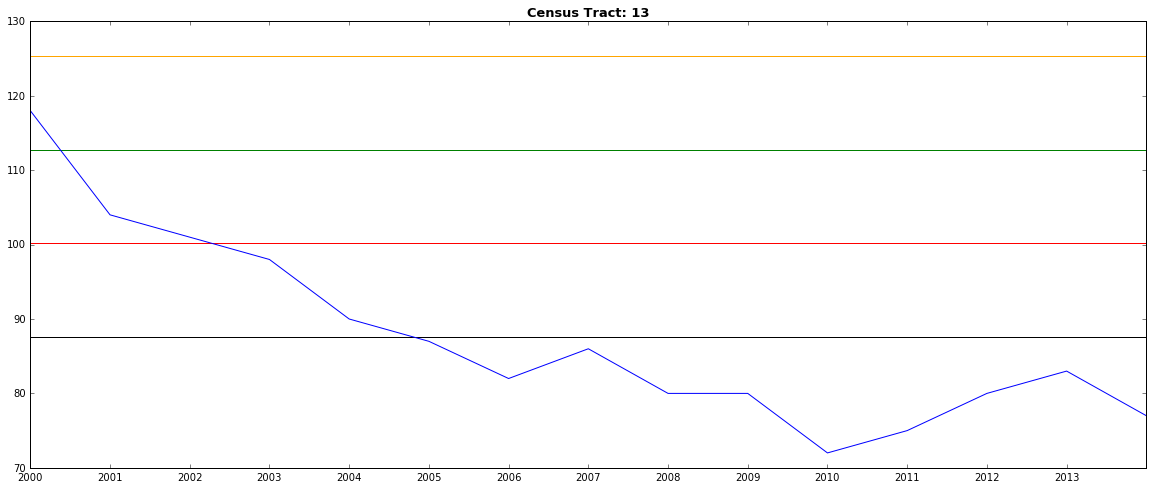

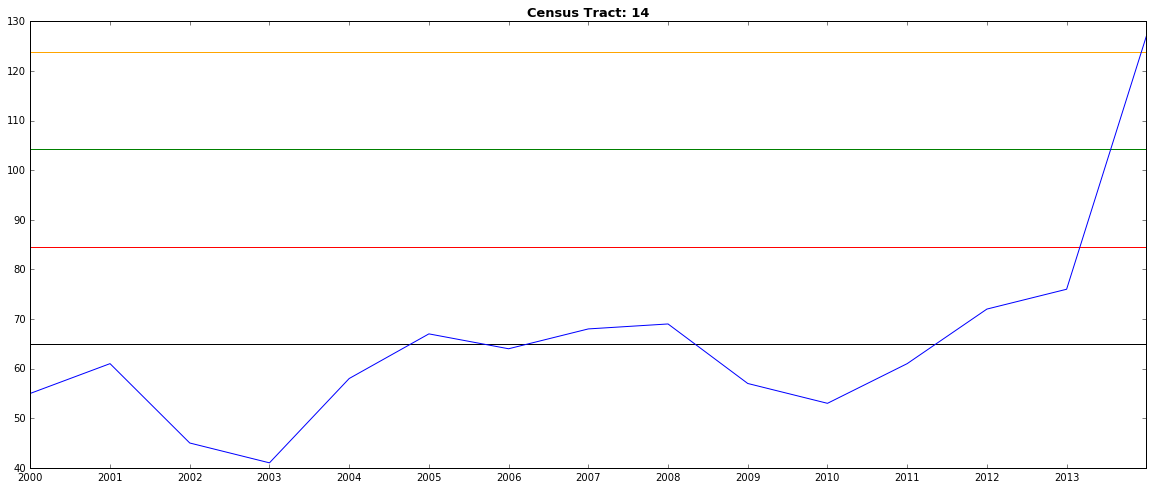

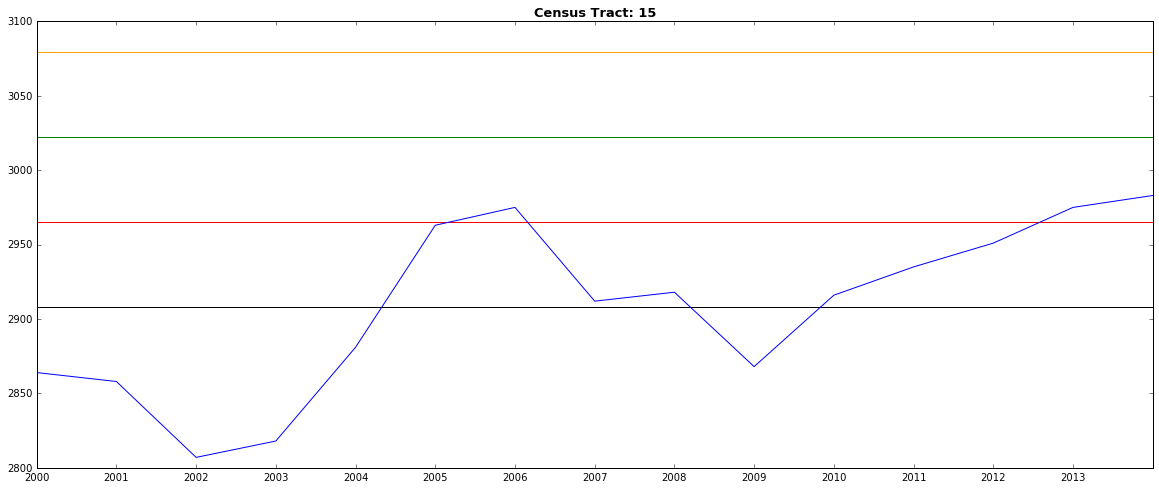

In [338]:
for i in range(2,16):
    
    mean = data_high_2[i].mean()
    std = data_high_2[i].std()
    std_1 = mean + (std)
    std_2 = mean + (2 * std)
    std_3 = mean + (3 * std)
    
    fig = plt.figure(figsize = (20,8))
    plt.plot(data_high_2['year'], data_high_2[i])
    plt.xticks([year for year in range(2000, 2014)])
    plt.hlines(mean, xmax= 2014, xmin=2000)
    plt.hlines(std_1, xmax= 2014, xmin=2000, colors = u'red', label = 'S.D.1')
    plt.hlines(std_2, xmax= 2014, xmin=2000, colors = u'green', label = 'S.D.2')
    plt.hlines(std_3, xmax= 2014, xmin=2000, colors = u'orange', label = 'S.D.3')
    plt.title("Census Tract: {}".format(i), fontweight = 'bold', fontsize = 13)